In [2]:
from scipy.misc import derivative
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

In [29]:
m = 1
g = 9.8

def x_0(t):
    return -g/2 * t**2 + 5*g*t

def L(t, x):
    v = lambda t: derivative(x, t)
    T = 0.5*m*(v(t))**2
    V = m*g*x(t)
    
    return T - V

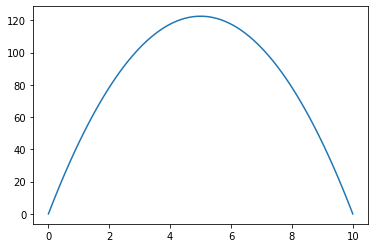

In [30]:
t_domain = np.linspace(0, 10, 100)
plt.plot(t_domain, x_0(t_domain))

In [31]:
S = integrate.quad(L, 0, 10, args=(x_0))

In [32]:
S

(-4001.666666666666, 8.131632075051929e-11)

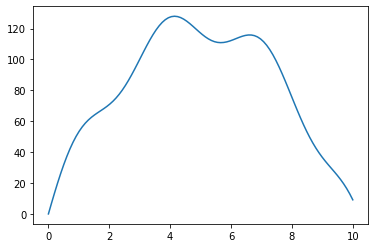

In [7]:
def x_wrong(t):
    return 10*np.sin(2*t)

t_domain = np.linspace(0, 10, 100)

def x(t, err_size=1):
    return x_0(t) + err_size*x_wrong(t)

plt.plot(t_domain, x(t_domain))

In [18]:
S = integrate.quad(L, 0, 10, args=(x))
S

(-4010.31209547299, 8.134644829483131e-11)

### Animate here


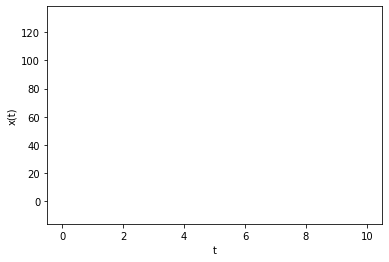

In [40]:
from matplotlib import rcParams, rc, animation
from IPython.display import HTML

fig2 = plt.figure()
plt.title(f"")
plt.xlabel("t")
plt.ylabel("x(t)")

frame_count = 60

def err_size(frame, frame_count):
    return np.sin(2*np.pi/frame_count * frame)

def L(t, err_size):
    x = lambda t: x_0(t) + err_size*x_wrong(t)
    
    T = 0.5*m*(derivative(x, t))**2
    V = m*g*x(t)
    
    return T - V

ims = []
for frame in np.arange(frame_count):
    testx1, = plt.plot(t_domain, x(t_domain, err_size(frame, frame_count)), color='#1f77b4')
    
    current_L = lambda t: L(t, err_size(frame, frame_count))
    S = plt.text(3, 20, f"S ={integrate.quad(current_L, 0, 10)[0]:.0f}")
    
    ims.append([testx1, S])

im_ani = animation.ArtistAnimation(fig2, ims, interval=120,
                                   blit=False)

HTML(im_ani.to_html5_video())

In [36]:
def x_wrong(t):
    return 10*np.sin(2*t)

t_domain = np.linspace(0, 10, 100)

def x(t, err_size=1):
    return x_0(t) + err_size*x_wrong(t)

frame_count = 30

def err_size(frame, frame_count):
    return np.sin(np.pi/frame_count * frame)

def L(t, err_size):
    x = lambda t: x_0(t) + err_size*x_wrong(t)
    
    T = 0.5*m*(derivative(x, t))**2
    V = m*g*x(t)
    
    return T - V

current_L = lambda t: L(t, 0)
integrate.quad(current_L, 0, 10)

(-4001.666666666666, 8.131632075051929e-11)